<a href="https://colab.research.google.com/github/bahl24/SpatalPyramidPooling_Keras/blob/master/sppnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x #for obj
from google.colab import drive
drive.mount('/content/drive')

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x #for obj`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
import numpy as np
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import keras
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator


dir_anno = "drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/Annotations"
img_dir  = "drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/JPEGImages"
dir_anno_test = "drive/My Drive/pascal-voc-2007/VOCtest/VOCdevkit/VOC2007/Annotations"
img_dir_test = "drive/My Drive/pascal-voc-2007/VOCtest/VOCdevkit/VOC2007/JPEGImages"

Using TensorFlow backend.


In [0]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(False)

In [0]:
# Use df_anno.csv for annotations. This code takes a lot of time, do not rerun.
def extract_from_xml(tree):
    num_obj = 0
    row  = {}
    for el in tree.iter():
      
      if el.tag == "object":
        for elem in el:
          if elem.tag == "name": # Process name tags
            row["box_{}_{}".format(num_obj,elem.tag)] = str(elem.text)              
          if elem.tag == "bndbox": # Process bounding box tags
            for i in elem:
              row["box_{}_{}".format(num_obj,i.tag)] = float(i.text)
            num_obj += 1
      
      if el.tag == "size":
        for elem in el:
          row[elem.tag] = int(elem.text)

    row["num_obj"] = num_obj
    return row

In [0]:
# Order in which columns are required
col = ['width','height','depth','num_obj','box_0_name','box_0_xmin','box_0_ymin','box_0_xmax','box_0_ymax','box_1_name','box_1_xmin','box_1_ymin','box_1_xmax','box_1_ymax','box_2_name','box_2_xmin','box_2_ymin','box_2_xmax','box_2_ymax','box_3_name','box_3_xmin',
 'box_3_ymin',
 'box_3_xmax',
 'box_3_ymax',
 'box_4_name',
 'box_4_xmin',
 'box_4_ymin',
 'box_4_xmax',
 'box_4_ymax',
 'box_5_name',
 'box_5_xmin',
 'box_5_ymin',
 'box_5_xmax',
 'box_5_ymax',
 'box_6_name',
 'box_6_xmin',
 'box_6_ymin',
 'box_6_xmax',
 'box_6_ymax',
 'box_7_name',
 'box_7_xmin',
 'box_7_ymin',
 'box_7_xmax',
 'box_7_ymax',
 'box_8_name',
 'box_8_xmin',
 'box_8_ymin',
 'box_8_xmax',
 'box_8_ymax',
 'box_9_name',
 'box_9_xmin',
 'box_9_ymin',
 'box_9_xmax',
 'box_9_ymax',
 'box_10_name',
 'box_10_xmin',
 'box_10_ymin',
 'box_10_xmax',
 'box_10_ymax',
 'box_11_name',
 'box_11_xmin',
 'box_11_ymin',
 'box_11_xmax',
 'box_11_ymax',
 'box_12_name',
 'box_12_xmin',
 'box_12_ymin',
 'box_12_xmax',
 'box_12_ymax',
 'box_13_name',
 'box_13_xmin',
 'box_13_ymin',
 'box_13_xmax',
 'box_13_ymax',
 'box_14_name',
 'box_14_xmin',
 'box_14_ymin',
 'box_14_xmax',
 'box_14_ymax',
 'box_15_name',
 'box_15_xmin',
 'box_15_ymin',
 'box_15_xmax',
 'box_15_ymax',
 'box_16_name',
 'box_16_xmin',
 'box_16_ymin',
 'box_16_xmax',
 'box_16_ymax',
 'box_17_name',
 'box_17_xmin',
 'box_17_ymin',
 'box_17_xmax',
 'box_17_ymax',
 'box_18_name',
 'box_18_xmin',
 'box_18_ymin',
 'box_18_xmax',
 'box_18_ymax',
 'box_19_name',
 'box_19_xmin',
 'box_19_ymin',
 'box_19_xmax',
 'box_19_ymax',
 'box_20_name',
 'box_20_xmin',
 'box_20_ymin',
 'box_20_xmax',
 'box_20_ymax',
 'box_21_name',
 'box_21_xmin',
 'box_21_ymin',
 'box_21_xmax',
 'box_21_ymax',
 'box_22_name',
 'box_22_xmin',
 'box_22_ymin',
 'box_22_xmax',
 'box_22_ymax',
 'box_23_name',
 'box_23_xmin',
 'box_23_ymin',
 'box_23_xmax',
 'box_23_ymax',
 'box_24_name',
 'box_24_xmin',
 'box_24_ymin',
 'box_24_xmax',
 'box_24_ymax',
 'box_25_name',
 'box_25_xmin',
 'box_25_ymin',
 'box_25_xmax',
 'box_25_ymax',
 'box_26_name',
 'box_26_xmin',
 'box_26_ymin',
 'box_26_xmax',
 'box_26_ymax',
 'box_27_name',
 'box_27_xmin',
 'box_27_ymin',
 'box_27_xmax',
 'box_27_ymax',
 'box_28_name',
 'box_28_xmin',
 'box_28_ymin',
 'box_28_xmax',
 'box_28_ymax',
 'box_29_name',
 'box_29_xmin',
 'box_29_ymin',
 'box_29_xmax',
 'box_29_ymax',
 'box_30_name',
 'box_30_xmin',
 'box_30_ymin',
 'box_30_xmax',
 'box_30_ymax',
 'box_31_name','box_31_xmin','box_31_ymin','box_31_xmax','box_31_ymax','box_32_name','box_32_xmin','box_32_ymin','box_32_xmax','box_32_ymax','box_33_name','box_33_xmin','box_33_ymin','box_33_xmax','box_33_ymax','box_34_name','box_34_xmin','box_34_ymin','box_34_xmax','box_34_ymax','box_35_name','box_35_xmin','box_35_ymin','box_35_xmax','box_35_ymax','box_36_name','box_36_xmin','box_36_ymin','box_36_xmax','box_36_ymax','box_37_name','box_37_xmin','box_37_ymin','box_37_xmax','box_37_ymax','box_38_name','box_38_xmin','box_38_ymin','box_38_xmax','box_38_ymax','box_39_name','box_39_xmin','box_39_ymin','box_39_xmax','box_39_ymax','box_40_name','box_40_xmin','box_40_ymin','box_40_xmax','box_40_ymax','box_41_name','box_41_xmin','box_41_ymin','box_41_xmax','box_41_ymax']

In [0]:
df_anno = []
for data in os.listdir(dir_anno):
  tree = ET.parse(os.path.join(dir_anno,data))
  row = extract_from_xml(tree)
  row["fileID"] = data.split(".")[0]
  df_anno.append(row)

In [0]:
df_anno = pd.DataFrame(df_anno,index=df_anno["fileID"])
df_anno_test = df_anno_test[col]

In [0]:
max_num_obj = np.max(df_anno["num_obj"]) # Stores the max

In [0]:
df_anno.to_csv(os.path.join("drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007","df_anno.csv"),index=False) # Save dataframe as csv file

In [0]:
# Check train data annotations
df_anno.head()

,width,height,depth,num_obj,box_0_name,box_0_xmin,box_0_ymin,box_0_xmax,box_0_ymax,box_1_name,box_1_xmin,box_1_ymin,box_1_xmax,box_1_ymax,box_2_name,box_2_xmin,box_2_ymin,box_2_xmax,box_2_ymax,box_3_name,box_3_xmin,box_3_ymin,box_3_xmax,box_3_ymax,box_4_name,box_4_xmin,box_4_ymin,box_4_xmax,box_4_ymax,box_5_name,box_5_xmin,box_5_ymin,box_5_xmax,box_5_ymax,box_6_name,box_6_xmin,box_6_ymin,box_6_xmax,box_6_ymax,box_7_name,...,box_34_name,box_34_xmin,box_34_ymin,box_34_xmax,box_34_ymax,box_35_name,box_35_xmin,box_35_ymin,box_35_xmax,box_35_ymax,box_36_name,box_36_xmin,box_36_ymin,box_36_xmax,box_36_ymax,box_37_name,box_37_xmin,box_37_ymin,box_37_xmax,box_37_ymax,box_38_name,box_38_xmin,box_38_ymin,box_38_xmax,box_38_ymax,box_39_name,box_39_xmin,box_39_ymin,box_39_xmax,box_39_ymax,box_40_name,box_40_xmin,box_40_ymin,box_40_xmax,box_40_ymax,box_41_name,box_41_xmin,box_41_ymin,box_41_xmax,box_41_ymax
fileID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
007963,500,375,3,6,person,285.0,291.0,304.0,337.0,person,263.0,293.0,284.0,335.0,car,457.0,230.0,500.0,248.0,car,1.0,322.0,80.0,375.0,car,1.0,338.0,38.0,375.0,train,1.0,200.0,470.0,334.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007954,500,334,3,1,dog,28.0,111.0,380.0,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007956,500,375,3,3,pottedplant,362.0,133.0,460.0,307.0,pottedplant,107.0,128.0,163.0,227.0,diningtable,2.0,167.0,500.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007970,500,375,3,3,car,101.0,146.0,326.0,299.0,car,296.0,163.0,500.0,248.0,person,224.0,142.0,263.0,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007964,500,333,3,2,person,174.0,120.0,256.0,171.0,car,52.0,118.0,407.0,245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Loading test data annotations
df_anno_test = []
for data in os.listdir(dir_anno_test):
  tree = ET.parse(os.path.join(dir_anno_test,data))
  row = extract_from_xml(tree)
  row["fileID"] = data.split(".")[0]
  df_anno_test.append(row)

In [0]:
df_anno_test = pd.DataFrame(df_anno_test, index=df_anno_test["fileID"])
df_anno_test = df_anno_test[col]

In [0]:
# Check test data annotations
df_anno_test.head()

In [0]:
# Loading training annotation data from csv file. temp code
df_anno = pd.read_csv("drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/df_anno.csv",index_col="fileID")
df_anno.head()
max_num_obj = 42
df_anno = df_anno[col]
df_anno.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,190,195,200,205,210) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Order in which testing columns are required
col_test = ['width',
 'height',
 'depth',
 'num_obj',
 'box_0_name',
 'box_0_xmin',
 'box_0_ymin',
 'box_0_xmax',
 'box_0_ymax',
 'box_1_name',
 'box_1_xmin',
 'box_1_ymin',
 'box_1_xmax',
 'box_1_ymax',
 'box_2_name',
 'box_2_xmin',
 'box_2_ymin',
 'box_2_xmax',
 'box_2_ymax',
 'box_3_name',
 'box_3_xmin',
 'box_3_ymin',
 'box_3_xmax',
 'box_3_ymax',
 'box_4_name',
 'box_4_xmin',
 'box_4_ymin',
 'box_4_xmax',
 'box_4_ymax',
 'box_5_name',
 'box_5_xmin',
 'box_5_ymin',
 'box_5_xmax',
 'box_5_ymax',
 'box_6_name',
 'box_6_xmin',
 'box_6_ymin',
 'box_6_xmax',
 'box_6_ymax',
 'box_7_name',
 'box_7_xmin',
 'box_7_ymin',
 'box_7_xmax',
 'box_7_ymax',
 'box_8_name',
 'box_8_xmin',
 'box_8_ymin',
 'box_8_xmax',
 'box_8_ymax',
 'box_9_name',
 'box_9_xmin',
 'box_9_ymin',
 'box_9_xmax',
 'box_9_ymax',
 'box_10_name',
 'box_10_xmin',
 'box_10_ymin',
 'box_10_xmax',
 'box_10_ymax',
 'box_11_name',
 'box_11_xmin',
 'box_11_ymin',
 'box_11_xmax',
 'box_11_ymax',
 'box_12_name',
 'box_12_xmin',
 'box_12_ymin',
 'box_12_xmax',
 'box_12_ymax',
 'box_13_name',
 'box_13_xmin',
 'box_13_ymin',
 'box_13_xmax',
 'box_13_ymax',
 'box_14_name',
 'box_14_xmin',
 'box_14_ymin',
 'box_14_xmax',
 'box_14_ymax',
 'box_15_name',
 'box_15_xmin',
 'box_15_ymin',
 'box_15_xmax',
 'box_15_ymax',
 'box_16_name',
 'box_16_xmin',
 'box_16_ymin',
 'box_16_xmax',
 'box_16_ymax',
 'box_17_name',
 'box_17_xmin',
 'box_17_ymin',
 'box_17_xmax',
 'box_17_ymax',
 'box_18_name',
 'box_18_xmin',
 'box_18_ymin',
 'box_18_xmax',
 'box_18_ymax',
 'box_19_name',
 'box_19_xmin',
 'box_19_ymin',
 'box_19_xmax',
 'box_19_ymax',
 'box_20_name',
 'box_20_xmin',
 'box_20_ymin',
 'box_20_xmax',
 'box_20_ymax',
 'box_21_name',
 'box_21_xmin',
 'box_21_ymin',
 'box_21_xmax',
 'box_21_ymax',
 'box_22_name',
 'box_22_xmin',
 'box_22_ymin',
 'box_22_xmax',
 'box_22_ymax',
 'box_23_name',
 'box_23_xmin',
 'box_23_ymin',
 'box_23_xmax',
 'box_23_ymax',
 'box_24_name',
 'box_24_xmin',
 'box_24_ymin',
 'box_24_xmax',
 'box_24_ymax',
 'box_25_name',
 'box_25_xmin',
 'box_25_ymin',
 'box_25_xmax',
 'box_25_ymax',
 'box_26_name',
 'box_26_xmin',
 'box_26_ymin',
 'box_26_xmax',
 'box_26_ymax',
 'box_27_name',
 'box_27_xmin',
 'box_27_ymin',
 'box_27_xmax',
 'box_27_ymax',
 'box_28_name',
 'box_28_xmin',
 'box_28_ymin',
 'box_28_xmax',
 'box_28_ymax',
 'box_29_name',
 'box_29_xmin',
 'box_29_ymin',
 'box_29_xmax',
 'box_29_ymax',
 'box_30_name',
 'box_30_xmin',
 'box_30_ymin',
 'box_30_xmax',
 'box_30_ymax',
 'box_31_name',
 'box_31_xmin',
 'box_31_ymin',
 'box_31_xmax',
 'box_31_ymax',
 'box_32_name',
 'box_32_xmin',
 'box_32_ymin',
 'box_32_xmax',
 'box_32_ymax',
 'box_33_name',
 'box_33_xmin',
 'box_33_ymin',
 'box_33_xmax',
 'box_33_ymax',
 'box_34_name',
 'box_34_xmin',
 'box_34_ymin',
 'box_34_xmax',
 'box_34_ymax',
 'box_35_name',
 'box_35_xmin',
 'box_35_ymin',
 'box_35_xmax',
 'box_35_ymax',
 'box_36_name',
 'box_36_xmin',
 'box_36_ymin',
 'box_36_xmax',
 'box_36_ymax',
 'box_37_name',
 'box_37_xmin',
 'box_37_ymin',
 'box_37_xmax',
 'box_37_ymax',
 'box_38_name',
 'box_38_xmin',
 'box_38_ymin',
 'box_38_xmax',
 'box_38_ymax',
 'box_39_name',
 'box_39_xmin',
 'box_39_ymin',
 'box_39_xmax',
 'box_39_ymax',
 'box_40_name',
 'box_40_xmin',
 'box_40_ymin',
 'box_40_xmax',
 'box_40_ymax',
]

In [0]:
# Loading test annotations data from csv file. temp code
df_anno_test = pd.read_csv("drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/df_anno_test.csv",index_col="fileID")
df_anno_test = df_anno_test[col_test]
df_anno_test.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (165,170,175,180,185,190,195,200,205) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,width,height,depth,num_obj,box_0_name,box_0_xmin,box_0_ymin,box_0_xmax,box_0_ymax,box_1_name,box_1_xmin,box_1_ymin,box_1_xmax,box_1_ymax,box_2_name,box_2_xmin,box_2_ymin,box_2_xmax,box_2_ymax,box_3_name,box_3_xmin,box_3_ymin,box_3_xmax,box_3_ymax,box_4_name,box_4_xmin,box_4_ymin,box_4_xmax,box_4_ymax,box_5_name,box_5_xmin,box_5_ymin,box_5_xmax,box_5_ymax,box_6_name,box_6_xmin,box_6_ymin,box_6_xmax,box_6_ymax,box_7_name,...,box_33_name,box_33_xmin,box_33_ymin,box_33_xmax,box_33_ymax,box_34_name,box_34_xmin,box_34_ymin,box_34_xmax,box_34_ymax,box_35_name,box_35_xmin,box_35_ymin,box_35_xmax,box_35_ymax,box_36_name,box_36_xmin,box_36_ymin,box_36_xmax,box_36_ymax,box_37_name,box_37_xmin,box_37_ymin,box_37_xmax,box_37_ymax,box_38_name,box_38_xmin,box_38_ymin,box_38_xmax,box_38_ymax,box_39_name,box_39_xmin,box_39_ymin,box_39_xmax,box_39_ymax,box_40_name,box_40_xmin,box_40_ymin,box_40_xmax,box_40_ymax
fileID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7981,500,333,3,1,person,106.0,96.0,377.0,332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7967,500,375,3,3,car,193.0,52.0,326.0,120.0,car,402.0,68.0,476.0,116.0,person,63.0,15.0,124.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7973,500,322,3,1,aeroplane,35.0,115.0,393.0,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7972,500,307,3,4,person,303.0,34.0,406.0,143.0,person,107.0,60.0,210.0,151.0,horse,226.0,49.0,472.0,253.0,horse,4.0,61.0,288.0,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7982,500,281,3,4,tvmonitor,89.0,141.0,166.0,189.0,tvmonitor,1.0,138.0,135.0,272.0,tvmonitor,86.0,149.0,331.0,240.0,tvmonitor,1.0,217.0,452.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Counter({'person': 5448, 'car': 1644, 'chair': 1432, 'bottle': 634, 'pottedplant': 625, 'bird': 599, 'dog': 538, 'sofa': 425, 'bicycle': 418, 'horse': 406, 'boat': 398, 'motorbike': 390, 'cat': 389, 'tvmonitor': 367, 'cow': 356, 'sheep': 353, 'aeroplane': 331, 'train': 328, 'diningtable': 310, 'bus': 272})


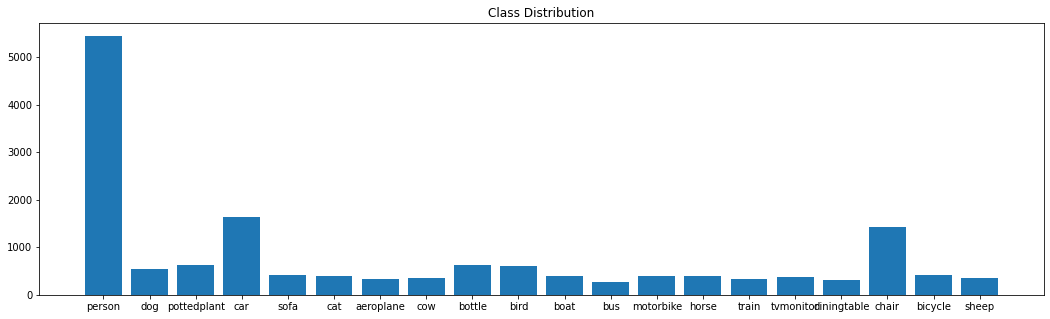

In [0]:
# Plot bar gragh and initiate directories
counter_obj = []
for i in range(0,max_num_obj):
    counter_obj.extend(df_anno["box_{}_name".format(i)].values)
counter_obj = np.asarray(counter_obj)

count = Counter(counter_obj[counter_obj != 'nan']) # Count occurences of a class excluding NaN values
print(count)

dict_y = {i:0 for i in list(count.keys())} # Identify the 20 classes of object that are present

# Plot the class distribution. Observe the data is quite unbalanced
xs = range(len(count.values()))
plt.rcParams["figure.figsize"] = (18,5)
plt.bar(xs,count.values())
plt.xticks(xs,count.keys())
plt.title("Class Distribution")
plt.show()

In [0]:
# Loading images
list_of_img_name = os.listdir(img_dir)
len(list_of_img_name)

In [0]:
# Image Variables
min_ref = 688
crop_dim = 688
channel = 3

In [0]:
def read_images(df_anno, list_of_img_name, img_dir):
  ''' This method reads the images from the list of image names and maps them with objects present in that image
      and returns the input variable (X) & output variable (y).
      Open CV is used to read, resize and interpolate the images.
      As the images are shrinked INTER_AREA interpolation technique has been used.

    # Input
        list of image names
    # Output
        X,y
    # Output shape : 
        X : (no. of eg, height, width, no. of channels = 3)
        y : (no. of eg, no. of object classes = 20)
  '''
  X = [] # Input Variable
  y = [] # Output Variable
  count= 0
  for img in list_of_img_name:
    fileID = img.split(".")[0]
    if(count%10==0):
      print(str(count) + "files are read" )
    count = count+1
    im = cv2.imread(img_dir + "/" + img)
    im_height, im_width, _ = im.shape
    aspect_ratio = im_height/im_width # Keep the aspect ratio same
    if im_height<im_width:
      im_height = min_ref
      im_width = int(min_ref/aspect_ratio)
    else:
      im_width = min_ref
      im_height = int(min_ref*aspect_ratio)
    im = cv2.resize(im,(im_width,im_height))
    h, w, _ = im.shape
    im = im[int(h/2-crop_dim/2):int(h/2+crop_dim/2) , int(w/2-crop_dim/2):int(w/2+crop_dim/2)] # Crop the middle view
    X.append(im)
    dict_y1 = dict_y.copy()
    for i in range(4,210,5):
      try:
        index_val = df_anno.loc[[str(fileID)]].to_numpy()[0][i]
      except:
        continue
      if(index_val is np.nan):
        break
      dict_y1[index_val] = 1
    assert len(list(dict_y1.values())) == 20 ,"Output length vector is not of correct size"
    y.append(np.array(list(dict_y1.values())))
  
  return np.asarray(X),np.asarray(y)

In [0]:
X,y = read_images(df_anno, list_of_img_name, img_dir) # Read training inputs and labels

0files are read
10files are read
20files are read
30files are read
40files are read
50files are read
60files are read
70files are read
80files are read
90files are read
100files are read
110files are read
120files are read
130files are read
140files are read
150files are read
160files are read
170files are read
180files are read
190files are read
200files are read
210files are read
220files are read
230files are read
240files are read
250files are read
260files are read
270files are read
280files are read
290files are read
300files are read
310files are read
320files are read
330files are read
340files are read
350files are read
360files are read
370files are read
380files are read
390files are read
400files are read
410files are read
420files are read
430files are read
440files are read
450files are read
460files are read
470files are read
480files are read
490files are read
500files are read
510files are read
520files are read
530files are read
540files are read
550files are read
560

In [0]:
list_of_img_name_test = os.listdir(img_dir_test)
X_test, y_test = read_images(df_anno_test, list_of_img_name_test, img_dir_test)

In [0]:
print(X.shape)
print(y.shape)

(5017, 688, 688, 3)
(5017, 20)


In [0]:
print(X_test.shape)
print(y_test.shape)

(4973, 180, 180, 3)
(4973, 20)


In [0]:
import numpy as np
import keras
from tensorflow.python.keras.models import Sequential,load_model,clone_model
from tensorflow.python.keras.layers import Convolution2D, Activation, MaxPooling2D, Dense, Flatten,Conv2D,Reshape,Dropout, Input
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import sys

In [0]:
# Making Sppnet custom layer
# Try refering github implementation
# Refer https://keras.io/layers/writing-your-own-keras-layers/
# or https://keras.io/examples/antirectifier/


if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

BATCH = 64

class SppnetLayer(Layer):
    '''This layer takes an input tensor and pools the tensor
      in local spatial bins.
      This layer uses Max pooling.
      It accepts input in tensorflow format. # channels last

    # Input
        list of filter in form [x,y,z] 
    # Input shape : 4d tensor [None, X,Y, channels]
    # Output shape : 3d tensor [None,pooled dim, channels] 

    '''
    def __init__(self, filters = [1], **kwargs):
        self.filters = filters
        super(SppnetLayer, self).__init__(**kwargs)

    def compute_output_shape(self, input_shape):
        length = 0;
        for f_size in self.filters:
            length+= (f_size*f_size)
        return (input_shape[0],length*input_shape[3])
      
    def get_config(self):
        config = {'filters': self.filters}
        base_config = super(SppnetLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def call(self, inputs):
      output = []
      for f_size in self.filters:
        win_size = K.int_shape(inputs)[1]/f_size
        #print(win_size)
        win_size = int(win_size)
        for x_start in range(0,f_size):
          for y_start in range(0,f_size):
            X = int(x_start*win_size)
            Y = int(y_start*win_size)
            result = K.max(inputs[:,X:X+win_size,Y:Y+win_size,:],axis = (1,2))
            output.append(result)
      output = K.concatenate(output)
      return output

#AlexNet Inmplementation with batch normalization layers
model = Sequential()
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same',activation = 'relu'))
model.add(BatchNormalization())
#model.add(Flatten()) # To implement Simple Alexnet
model.add(SppnetLayer([1,2,4,6])) #To implement SppNet 
model.add(Dense(4096,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4096,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation= 'sigmoid'))
print(model.summary())


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________

In [0]:
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
CSV_logger = CSVLogger('CSV_sppnet.log')
datagen = ImageDataGenerator(horizontal_flip=True,
                             #rescale = 1./255,
                             data_format="channels_last",
                             validation_split=0.2)

train_generator = datagen.flow(
    X,
    y,
    batch_size=BATCH,
    subset='training',
)
validation_generator = datagen.flow(
    X,
    y,
    batch_size=BATCH,
    subset='validation',
)

In [0]:
H1 = model.fit_generator(train_generator,steps_per_epoch=len(X)/BATCH,epochs=100, callbacks=[CSV_logger]) # Fit model to training data

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
79/78 [==============================] - 29s 371ms/step - loss: 3.6047 - acc: 0.5496
Epoch 2/100
79/78 [==============================] - 16s 206ms/step - loss: 3.5694 - acc: 0.5542
Epoch 3/100
79/78 [==============================] - 16s 207ms/step - loss: 3.5835 - acc: 0.5566
Epoch 4/100
79/78 [==============================] - 16s 206ms/step - loss: 3.4472 - acc: 0.5534
Epoch 5/100
79/78 [==============================] - 16s 206ms/step - loss: 3.0959 - acc: 0.5566
Epoch 6/100
79/78 [==============================] - 16s 206ms/step - loss: 2.9143 - acc: 0.5544
Epoch 7/100
79/78 [==============================] - 16s 205ms/step - loss: 2.7435 - acc: 0.5524
Epoch 8/100
79/78 [==============================] - 16s 206ms/step - loss: 2.6138 - acc: 0.5556
Epoch 9/100
79/78 [==============================] - 16s 205ms/step - loss: 2.4998 - acc: 0.5602
Epoch 10/100
79/78 [=============

In [0]:
# Save model to google drive, change version to avoid overwriting
model_json = model.to_json()
with open("/content/drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/model_spp_new_Apr15.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/model_spp_new_Apr15.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
H1_validation = model.fit_generator(validation_generator,steps_per_epoch=len(X)/BATCH,epochs=100, callbacks=[CSV_logger]) # Fit model to validation data

Epoch 1/100
79/78 [==============================] - 17s 218ms/step - loss: 3.6863 - acc: 0.3706
Epoch 2/100
79/78 [==============================] - 16s 203ms/step - loss: 2.1080 - acc: 0.4100
Epoch 3/100
79/78 [==============================] - 16s 203ms/step - loss: 1.6193 - acc: 0.4169
Epoch 4/100
79/78 [==============================] - 16s 201ms/step - loss: 1.4371 - acc: 0.4078
Epoch 5/100
79/78 [==============================] - 16s 202ms/step - loss: 1.3903 - acc: 0.4068
Epoch 6/100
79/78 [==============================] - 16s 202ms/step - loss: 1.3559 - acc: 0.4054
Epoch 7/100
79/78 [==============================] - 16s 202ms/step - loss: 1.3351 - acc: 0.4069
Epoch 8/100
79/78 [==============================] - 16s 203ms/step - loss: 1.3335 - acc: 0.4038
Epoch 9/100
79/78 [==============================] - 16s 202ms/step - loss: 1.3218 - acc: 0.4046
Epoch 10/100
79/78 [==============================] - 16s 201ms/step - loss: 1.3275 - acc: 0.4075
Epoch 11/100
79/78 [=========

KeyboardInterrupt: ignored

In [0]:
# Order of output label
output_label = ['person',
 'dog',
 'pottedplant',
 'car',
 'sofa',
 'cat',
 'aeroplane',
 'cow',
 'bottle',
 'bird',
 'boat',
 'bus',
 'motorbike',
 'horse',
 'train',
 'tvmonitor',
 'diningtable',
 'chair',
 'bicycle',
 'sheep',
 'background']

In [0]:
display = (model.predict_on_batch(X[0:1])>0.5)[0]
print(display[0])
for i in range(0,len(output_label)):
  if display[i] == True:
    print(output_label[i])

True
person


In [0]:
from sklearn.metrics import average_precision_score as aps

In [0]:
threshold = 0.0
apsc =0
for i in range(1,50):
  y_pred = (model.predict(X)> i/50).astype(int)
  if(apsc < aps(y,y_pred)):
    threshold = i/50
    apsc = aps(y,y_pred)
    print(apsc,threshold)

In [0]:
# load json and create model from previously saved weights
model.load_weights("drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/model_spp_new_Apr15.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


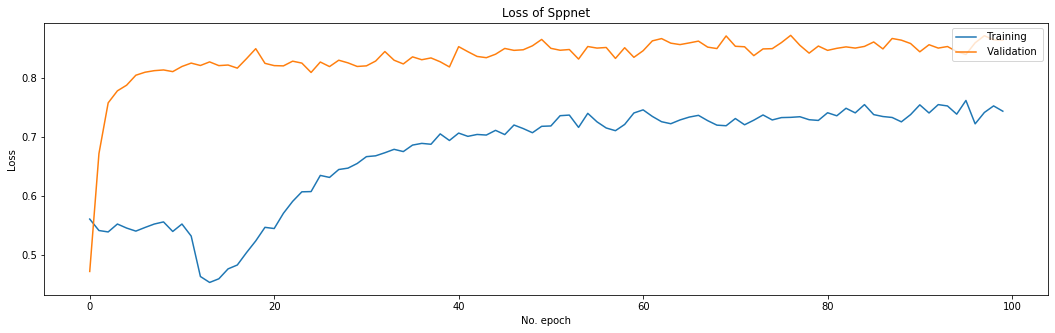

In [0]:
# Plot training and validation losses
print(H1)
plt.plot(H1.history['accuracy'], label=' Training ')
plt.plot(H1_validation.history['accuracy'], label=' Validation ')
plt.title('Loss of Sppnet')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [0]:
# Evaluate testing data
datagen_test = ImageDataGenerator(horizontal_flip=False,data_format="channels_last")
test_generator = datagen.flow(X_test, y_test, batch_size=32)
test_generator.reset()
pred = model.predict_generator(test_generator,steps_per_epoch=len(X_test)/32,epochs=100, callbacks=[model_checkpoint,CSV_logger])

In [0]:
# Object Detection

In [0]:
def get_iou(bb1, bb2):
    '''
    Returns IoU for bounding box bb1 & bb2.
    # Input
      bb1: {x1: , x2: , y1:, y2: }
      bb2: {x1: , x2: , y1:, y2: }
    # Output
      Value between 0 & 1
    '''
    assert bb1['x1'] <= bb1['x2']
    assert bb1['y1'] <= bb1['y2']
    assert bb2['x1'] <= bb2['x2']
    assert bb2['y1'] <= bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    # print(iou)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [0]:
# Selective Search object
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [0]:
def show_region(im, rects):
  imOut = im.copy()
  for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < 40):
      x, y, w, h = rect
      cv2.rectangle(imOut, (x, y), (x+w, y+h), (255, 0, 0) )
      if(i%1==0):
        cv2_imshow(imOut)
    else:
      break

In [0]:
def show_region_with_label_ori(im, rects,labels):
  '''
  Displays the ground truth bounding boxes for a image
  # Input
    im: image
    rects: Coordinates of bounding box
    labels: Labels for each box
  '''
  imOut = im.copy()
  for i, rect in enumerate(rects):
      x1 = int(rects[i][0])
      y1 = int(rects[i][1]) 
      x2 = int(rects[i][2])
      y2 = int(rects[i][3])
      #print(x1,y1,x2,y2)
      cv2.rectangle(imOut,
                    (x1, y1),
                    (x2, y2),
                    (255, 255, 0) )
      cv2.putText(imOut,
                  labels[i],
                  (x1,y1),
                  cv2.FONT_HERSHEY_COMPLEX,
                  0.5,
                  (255,255,255),
                  1)
  cv2_imshow(imOut)

In [0]:
def show_region_with_label(im, rects,labels):
  '''
  Displays the proposed regions for a image
  # Input
    im: image
    rects: Coordinates of bounding box
    labels: Labels for each box
  '''
  imOut = im.copy()
  for i, rect in enumerate(rects):
      x1, y1, x2, y2 = rect
      cv2.rectangle(imOut, (x1, y1), (x2, y2), (255, 0, 0) )
      cv2.putText(imOut,labels[i],(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,255,255),1)
  cv2_imshow(imOut)

In [0]:
def get_rects(rects):
  '''
  Converts (x, y, w, h) -> (x, y, x+w, y+h)
  '''
  rects_mod = []
  for rect in rects:
    x, y, w, h = rect
    if(w>69 and h>69):
      rects_mod.append(np.asarray([x, y, x+w, y+h]))
  return np.asarray(rects_mod)

In [0]:
# Performs selective search
def get_region_proposals(input_imgs):
  '''
  Performs selective search on the input images to get region proposals
  '''
  region_proposal = []
  for i in range(input_imgs.shape[0]):
    ss.setBaseImage(input_imgs[i])
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    # print(rects.shape)
    #show_region(input_imgs[i], rects)
    rects_mod = get_rects(rects) # (x,y,w,h) -> (x,y,x+w,y+h)
    region_proposal.append(rects_mod)
  return region_proposal

In [0]:
no_region_proposal = 2000 # Should be 2000 for bigger dim img

In [0]:
# Image Variables
min_ref = 256
crop_dim = 224
channel = 3

In [0]:
def get_resized_image(im):
    '''
    Returns cropped image after resizing to keep aspect ratio same as original
    '''
    im_height, im_width, _ = im.shape
    aspect_ratio = im_height/im_width
    if im_height<im_width:
      im_height = min_ref
      im_width = int(min_ref/aspect_ratio)
    else:
      im_width = min_ref
      im_height = int(min_ref*aspect_ratio)
    im = cv2.resize(im,(im_width,im_height))
    im = cv2.resize(im,(im_width,im_height))
    h, w, _ = im.shape
    im = im[int(h/2-crop_dim/2):int(h/2+crop_dim/2) , int(w/2-crop_dim/2):int(w/2+crop_dim/2)]
    return im

In [0]:
def read_images_for_detection(df_anno, list_of_img_name, img_dir, threshold = 0.6):
  ''' This method reads the images from the list of image names and finds all the region proposals. Region proposals whose IoU with 
      corresponding ground truth boxes is greater than threshold are taken as positive samples.
      Proposals whose IoU < 0.2 are classified as background and counted as negative samples
      Open CV is used to read, resize and interpolate the images.
    # Input
        df_anno: dataframe,
        list of image names: list of image names,
        img_dir: image path,
        threshold: min IoU to be classified as an object
    # Output
        X: images,
        region_proposals: Co-ordinates of each region proposal,
        out: labels for each BB,
        np_of_proposals: list containing no of region proposals taken for each image
        gt_boxes: ground truth values
  '''
  X = [] # Input Variable
  y = [] # Output Variable
  region_proposals = [] # Region Proposals
  countobj = 0 # obj counter
  gt_boxes = [] # output__gt_boxes
  count= 0
  no_of_proposals = []
  for img in list_of_img_name:
    fileID = img.split(".")[0]
    if(count%1==0):
      print(str(count) + "files are read" )
    count = count+1
    im = cv2.imread(img_dir + "/" + img)
    real_height, real_width, _ = im.shape
    im = get_resized_image(im)
    imlist = []
    imlist.append(im)
    rp = get_region_proposals(np.asarray(imlist))
    if (len(rp[0]) <= 1):
      continue
    trueCounter = 0
    falseCounter = 0
    trueFlag = 0
    falseFlag = 0
    #print(rp[0].shape)
    yj = []
    X.append(get_resized_image(im))
    rj = []
    gt = []
    bb_to_be_displayed = []
    label_to_be_displayed = []
    bb_to_be_original = []
    label_to_be_original = []
    for j in range(len(rp[0])-1,0,-1):
      roi = {'x1' : rp[0][j][0],'x2' : rp[0][j][2],'y1' : rp[0][j][1],'y2' :rp[0][j][3]}
      dict_y1 = dict_y.copy()
      dict_y1.update({'background':0})
      flag =0
      for i in range(4,210,5):
        try:
          index_val = df_anno.loc[[str(fileID)]].to_numpy()[0][i]
          if(index_val is np.nan):
            break
         # print("Proposal "+str(j)+" -> object"+str(countobj)+index_val)
          index_xmin = df_anno.loc[[str(fileID)]].to_numpy()[0][i+1]
          index_ymin = df_anno.loc[[str(fileID)]].to_numpy()[0][i+2]
          index_xmax = df_anno.loc[[str(fileID)]].to_numpy()[0][i+3]
          index_ymax = df_anno.loc[[str(fileID)]].to_numpy()[0][i+4]
          index_xmin = 224*(index_xmin/real_width)
          index_xmax = 224*(index_xmax/real_width)
          index_ymin = 224*(index_ymin/real_height)
          index_ymax = 224*(index_ymax/real_height)
          bb = {'x1' : index_xmin,'y1' : index_ymin,'x2' : index_xmax,'y2' : index_ymax}
          listbb = [ v for k, v in bb.items()]
        except:
          continue
        iou_calculated = get_iou(roi,bb)
        if(j==len(rp[0])-1):
          bb_to_be_original.append(listbb)
          label_to_be_original.append(index_val)
        countobj = countobj+1
        if trueCounter < 100:
          if(iou_calculated>threshold):
            bb_to_be_displayed.append(rp[0][j])
            label_to_be_displayed.append(index_val)
            flag=1
            dict_y1[index_val] = 1
            trueCounter += 1
            yj.append(np.array(list(dict_y1.values())))
            rj.append(rp[0][j])
            gt.append(listbb-rp[0][j])
            break
        else:
          trueFlag = 1
      if falseCounter < 30:
        if(iou_calculated<0.2):
          falseCounter += 1
          dict_y1['background'] =1
          yj.append(np.array(list(dict_y1.values())))
          rj.append(rp[0][j])
          gt.append(rp[0][j]-rp[0][j])
      else:
        falseFlag = 1
      if trueFlag==1 and falseFlag==1:
        break
      assert len(list(dict_y1.values())) == 21 ,"Output length vector is not of correct size"
   # print(len(yj))
    
    no_of_proposals.append(falseCounter+trueCounter)
    print(falseCounter+trueCounter)
    y.append(yj)
    region_proposals.append(rj)
    gt_boxes.append(gt)
    #show_region_with_label_ori(im,bb_to_be_original,label_to_be_original)
    #show_region_with_label(im,bb_to_be_displayed,label_to_be_displayed)
  #print(countobj)
  return np.asarray(X,dtype='float'),np.asarray(region_proposals),np.asarray(y),np.asarray(no_of_proposals),np.asarray(gt_boxes)

In [0]:
input_imgs, region_proposals, out , no_of_proposals, gt_boxes = read_images_for_detection(df_anno, list_of_img_name[0:50], img_dir)

0files are read
47
1files are read
49
2files are read
20
3files are read
43
4files are read
51
5files are read
35
6files are read
35
7files are read
46
8files are read
45
9files are read
30
10files are read
14
11files are read
29
12files are read
30
13files are read
40
14files are read
58
15files are read
30
16files are read
54
17files are read
52
18files are read
49
19files are read
54
20files are read
39
21files are read
33
22files are read
34
23files are read
39
24files are read
45
25files are read
46
26files are read
42
27files are read
15
28files are read
10
29files are read
37
30files are read
28
31files are read
47
32files are read
45
33files are read
31
34files are read
32
35files are read
39
36files are read
38
37files are read
38
38files are read
38
39files are read
30
40files are read
44
41files are read
30
42files are read
30
43files are read
54
44files are read
24
45files are read
43
46files are read
36
47files are read
28
48files are read
30
49files are read
23


In [0]:
list_of_img_name_test = os.listdir(img_dir_test)
input_imgs_test, region_proposals_test, out_test ,no_of_proposals_test = read_images_for_detection(df_anno_test,list_of_img_name_test[0:100], img_dir_test)

In [0]:
# Check shape of all variables
print(input_imgs.shape)
print(out.shape)
print(region_proposals.shape)
print(gt_boxes.shape)
print(no_of_proposals)

(50, 224, 224, 3)
(50,)
(50,)
(50,)
[47 49 20 43 51 35 35 46 45 30 14 29 30 40 58 30 54 52 49 54 39 33 34 39
 45 46 42 15 10 37 28 47 45 31 32 39 38 38 38 30 44 30 30 54 24 43 36 28
 30 23]


In [0]:
print(input_imgs_test.shape)
print(out_test.shape)
print(region_proposals_test.shape)

(100, 224, 224, 3)
(100,)
(100,)


In [0]:
# Use weights corresponding to the model used for classification, to get the feature map of all images
model_2 = clone_model(model)
model_2.set_weights(model.get_weights())
print(len(model_2.layers))
# Use only the conv layers and not the pooling layers and set 'trainable' param as false
for i in range(6):
  model_2.pop()
print(len(model_2.layers))
for layer in model_2.layers:
  layer.trainable = False
  print(layer, layer.trainable)
print(model_2.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
18
12
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa61d7e4e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faa5341fbe0> False
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7faa5341fc18> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa5341f668> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faa5341f4e0> False
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7faa5341fd30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa534221d0> False
<tensorflow.python.ke

In [0]:
# Obtain the feature map corresponding to each image
model_2_output = model_2.predict_on_batch(input_imgs)
print(model_2_output.shape)
print(region_proposals.shape)
#print(region_proposals)
# model_2_output[0].dtype

(50, 13, 13, 256)
(50,)


In [0]:
model_2_output_test = model_2.predict_on_batch(input_imgs_test)
print(model_2_output_test.shape)

(100, 13, 13, 256)


In [0]:
len(out[0])

158

In [0]:
len(region_proposals)

100

In [0]:
import copy
def roi_projection(region_proposal):
  '''
  This functions does RoI projection of region proposals on the featured map (obtained after conv layers)
  '''
  rp = copy.deepcopy(region_proposal)
  sho = model_2_output.shape[1]
  subsampling_ratio = sho/224
  #print((model_2_output.shape[0]).va
  print(subsampling_ratio)
  # print(len(rp))
  for i in range(len(rp)):
    for rects in range(len(rp[i])):
      #print(region_proposal[i][rects])
      rp[i][rects] = np.round(rp[i][rects]*subsampling_ratio)
     # print(rp[i][rects])
  return np.asarray(rp)

In [0]:

region_projection_coord = roi_projection(region_proposals)


0.05803571428571429


In [0]:
region_projection_coord_test = roi_projection(region_proposals_test)

0.05803571428571429


In [0]:
import math
def doSPP(filters, inputs):
  '''
    Perform Spatial Pyramid Pooling on input feature map.
    # Inputs
      filters: List of size of pooling filter to be used
      inputs: feature map corresponding to region proposals
    # Output
      Returns flattened output obtained after pooling
  '''
  output = []
  for f_size in filters:
    input_shape = inputs.shape
    win_size_x = int(math.ceil(input_shape[0]/f_size))
    win_size_y = int(math.ceil(input_shape[1]/f_size))
    ip = np.zeros((win_size_x*f_size,win_size_y*f_size,input_shape[2]))
    ip[0:input_shape[0],0:input_shape[1],:]=inputs[0:input_shape[0],0:input_shape[1],:]
    for X in range(0,win_size_x*f_size,win_size_x):
      for Y in range(0,win_size_y*f_size,win_size_y):
        result = np.max(ip[X:X+win_size_x,Y:Y+win_size_y,:],axis = (0,1))
        output.append(result)
  output = np.concatenate(np.asarray(output))
  # print(output.shape)  
  return output

In [0]:
def roi_pooling(region_projection_coord):
  '''
    Slices the feature map and performs SPP
  '''
  region_proposals = []
  for i in range(len(region_projection_coord)):
    rects = []
    #print(i)
    for j in range(len(region_projection_coord[i])):
      # print(j,model_2_output[i].shape)
      xmin, ymin, xmax, ymax = region_projection_coord[i][j].astype('int')
      # print(i,xmin,xmax,ymin,ymax)
      rects.append(np.asarray(doSPP([1,2,4], model_2_output[i][xmin:xmax,ymin:ymax,:])) )# Do SPP on
    region_proposals.append(np.asarray(rects))
  return np.asarray(region_proposals)

In [0]:
features = roi_pooling(region_projection_coord)

In [0]:
features[1].shape

(121, 5376)

In [0]:
features_test = roi_pooling(region_projection_coord_test)
print(features_test.shape)

(100,)


In [0]:
# Consider each region proposal as separate example
print(features.shape)
features = np.vstack(features)

out = np.vstack(out)
print(features.shape, out.shape)

region_proposals_stack = np.vstack(region_proposals)
gt_boxes_stack = np.vstack(gt_boxes)
print(features.shape, out.shape, region_proposals_stack.shape, gt_boxes_stack.shape)

(50,)
(1859, 5376) (1859, 21)
(1859, 5376) (1859, 21) (1859, 4) (1859, 4)


In [0]:
print(features_test.shape)
features_test = np.vstack(features_test)

out_test = np.vstack(out_test)
print(features_test.shape, out_test.shape)

NameError: ignored

In [0]:
print(features.shape)
print(out.shape)

(1859, 5376)
(1859, 21)


In [0]:
print(features_test.shape)
print(out_test.shape)

(10098, 5376)
(10098, 21)


In [0]:

#gt_boxes_stack.dtype = 'int32' 
tempcopy = gt_boxes_stack.copy()
for i in range(0,tempcopy.shape[0]):
  tempcopy[i][0] = int(tempcopy[i][0])
  tempcopy[i][1] = int(tempcopy[i][1])
  tempcopy[i][2] = int(tempcopy[i][2])
  tempcopy[i][3] = int(tempcopy[i][3])
gt_boxes_stack = tempcopy

In [0]:
# Define recall, precision & f1 metric
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
# Design model for classification of BB
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.initializers import RandomUniform,Zeros
input_3 = Input(shape=(features.shape[1],))
dense_1 = Dense(4096, activation='relu')(input_3)
out_label = Dense(21, activation='softmax',name = 'Labels')(dense_1)
model_3 = Model(inputs = input_3, outputs = out_label)

print(model_3.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5376)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              22024192  
_________________________________________________________________
Labels (Dense)               (None, 21)                86037     
Total params: 22,110,229
Trainable params: 22,110,229
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_3.compile(loss=['categorical_crossentropy'],optimizer = sgd, metrics=['accuracy'],)

In [0]:
# Calculate class weights as data is unbalanced
class_weight = np.zeros(21,dtype = 'int64')
for i in range(0,out.shape[0]):
  for j in range(0,21):
    if(out[i][j]==1):
      class_weight[j] = class_weight[j]+1
print(class_weight)
class_weight = 1./class_weight
print(class_weight) 

In [0]:
model_3.fit(features,out,epochs =20, )

Epoch 1/20
1859/1859 [==============================] - 12s 6ms/step - loss: 1.0636 - accuracy: 0.7127
Epoch 2/20
1859/1859 [==============================] - 12s 6ms/step - loss: 0.9240 - accuracy: 0.7375
Epoch 3/20
1859/1859 [==============================] - 12s 6ms/step - loss: 0.7973 - accuracy: 0.7692
Epoch 4/20
1859/1859 [==============================] - 12s 6ms/step - loss: 0.5950 - accuracy: 0.8128
Epoch 5/20
1859/1859 [==============================] - 14s 7ms/step - loss: 0.7474 - accuracy: 0.7870
Epoch 6/20
1859/1859 [==============================] - 13s 7ms/step - loss: 0.5455 - accuracy: 0.8424
Epoch 7/20
1859/1859 [==============================] - 12s 6ms/step - loss: 0.7663 - accuracy: 0.8037
Epoch 8/20
1859/1859 [==============================] - 12s 6ms/step - loss: 0.4638 - accuracy: 0.8580
Epoch 9/20
1859/1859 [==============================] - 12s 6ms/step - loss: 0.3947 - accuracy: 0.8763
Epoch 10/20
1859/1859 [==============================] - 12s 6ms/step - l

In [0]:
# Design model for bounding box regressor
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.initializers import RandomUniform,Zeros
input_4 = Input(shape=(features.shape[1],))
dense_2 = Dense(4096, activation='relu')(input_4)
inital = Zeros()
out_bbreg = Dense(4, activation='linear',name = 'BBreg',kernel_initializer = inital)(dense_2)
model_4 = Model(inputs = input_4, outputs = out_bbreg )
print(model_4.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5376)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              22024192  
_________________________________________________________________
BBreg (Dense)                (None, 4)                 16388     
Total params: 22,040,580
Trainable params: 22,040,580
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_4.compile(loss=['mae'],optimizer = sgd, metrics=['mae'],)

In [0]:
model_4.fit(features,gt_boxes_stack,epochs =50,verbose =1 )

Epoch 1/50
1859/1859 [==============================] - 10s 6ms/step - loss: 4.0234 - mae: 4.0234
Epoch 2/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8380 - mae: 3.8380
Epoch 3/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8375 - mae: 3.8375
Epoch 4/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8447 - mae: 3.8446
Epoch 5/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8196 - mae: 3.8196
Epoch 6/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8223 - mae: 3.8223
Epoch 7/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8200 - mae: 3.8200
Epoch 8/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8173 - mae: 3.8173
Epoch 9/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8030 - mae: 3.8030
Epoch 10/50
1859/1859 [==============================] - 10s 5ms/step - loss: 3.8040 - mae: 3.8040
Epoch 11/50
1859/18

In [0]:
model_3.evaluate(features[0:1],gt_boxes_stack[0:1],verbose =1)

1/1 [==============================] - 0s 79ms/step


[8.355113476077314e-12, 8.355113476077314e-12]

In [0]:
# Save model to google drive, change version to avoid overwriting
model_json = model_3.to_json()
with open("/content/drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/model__obj_spp_new_May4.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/My Drive/pascal-voc-2007/VOCtrainval/VOCdevkit/VOC2007/model__obj_spp_new_May4.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
def show_region_with_label_output(im, rects,labels):
  '''
  Displays the ground truth bounding boxes for a image
  # Input
    im: image
    rects: Coordinates of bounding box
    labels: Labels for each box
  '''
  imOut = im.copy()
  for i, rect in enumerate(rects):
      x1 = int(rects[i][0])
      y1 = int(rects[i][1]) 
      x2 = int(rects[i][2])
      y2 = int(rects[i][3])
      #print(x1,y1,x2,y2)
      if(labels[i]!='background'):
        cv2.rectangle(imOut,
                    (x1, y1),
                    (x2, y2),
                    (255, 255, 0) )
        cv2.putText(imOut,
                  labels[i],
                  (x1,y1),
                  cv2.FONT_HERSHEY_COMPLEX,
                  0.5,
                  (255,255,255),
                  1)
  cv2_imshow(imOut)

In [0]:
def non_max_suppression_fast(box_input, labels_input,overlapThresh):
	'''
	Performs non-max suppresion i.e prevents multiple BB for same object in image
	'''
	boxes = []
	labels = []
	for i in range(0,len(labels_input)):
		if(labels_input[i]!='background'):
			labels.append(labels_input[i])
			boxes.append(box_input[i])
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return [],[]

	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
#	print(len(boxes))
	#print(boxes)
	x1 = np.zeros(len(boxes))
	y1 = np.zeros(len(boxes))
	x2 = np.zeros(len(boxes))
	y2 = np.zeros(len(boxes))
	for i in range(0,len(boxes)):
		x1[i] = boxes[i][0]
		y1[i] = boxes[i][1]
		x2[i] = boxes[i][2]
		y2[i] = boxes[i][3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		#print(labels[i])
		idxs = np.delete(idxs, np.concatenate(([last],np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	ret_rpop = []
	lbel  = []
	#print(len(pick))
	for i in range(0,len(pick)):
		ret_rpop.append(boxes[pick[i]])
		lbel.append(labels[pick[i]])
	return ret_rpop, lbel

In [0]:

def show_result_detection_test(image_no):#on test images
  display = []
  pre_count =0
  for i in range(0,image_no):
    pre_count+=no_of_proposals_test[i]
  for i in range(pre_count,pre_count+no_of_proposals_test[image_no]) :
   # print(i)
    display.append(np.argmax(model_3.predict_on_batch(features_test[i:i+1])))
  output_lab = []
  for i in range(0,no_of_proposals_test[image_no]):
      # if(output_label[display[i]]!='background'):
      #   print(output_label[display[i]])
      output_lab.append(output_label[display[i]])
 # print(region_proposals[image_no])
  show_region_with_label_output(input_imgs_test[image_no],region_proposals_test[image_no],output_lab)#background supressed
  
for i in range(0,10):
  print(no_of_proposals_test[i])
  show_result_detection_test(i)

47


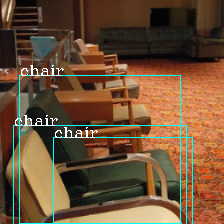

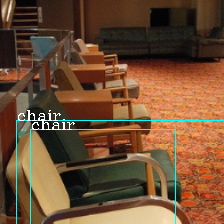

49


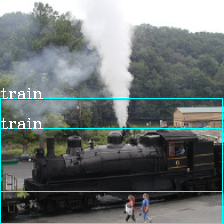

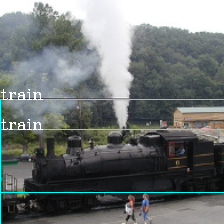

20


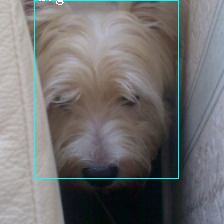

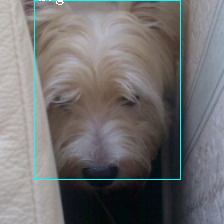

43


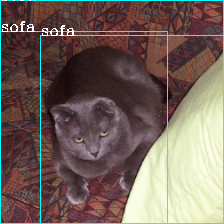

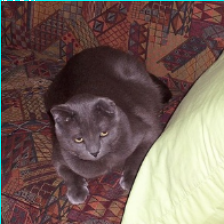

51


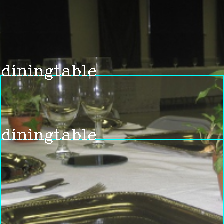

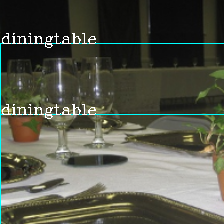

35


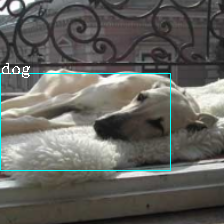

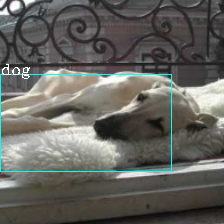

35


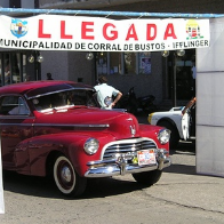

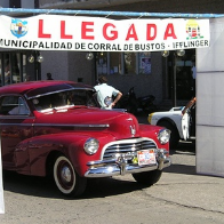

46


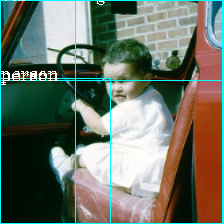

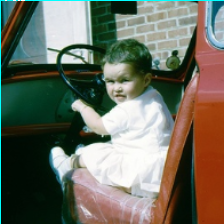

45


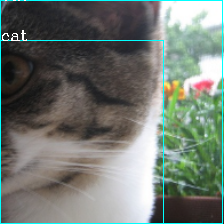

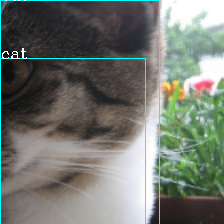

30


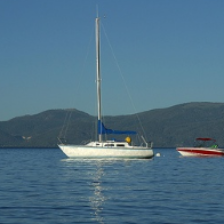

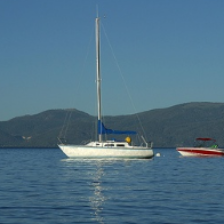

In [0]:

def show_result_detection(image_no):#on train images
  display = []
  pre_count =0
  for i in range(0,image_no):
    pre_count+=no_of_proposals[i]
  for i in range(pre_count,pre_count+no_of_proposals[image_no]) :
    display.append(np.argmax(model_3.predict_on_batch(features[i:i+1])[0]))

  output_lab = []
  for i in range(0,no_of_proposals[image_no]):
      output_lab.append(output_label[display[i]])
  
  #print(region_proposals[image_no])
  BB_regressed = []
  for i in range(pre_count,pre_count+no_of_proposals[image_no]) :
    bb_new = []
    ano = model_4.predict_on_batch(features[i:i+1])
    #print(ano)
    dx1 = ano[0][0]
    dy1 = ano[0][1]
    dx2 = ano[0][2]
    dy2 = ano[0][3]
    nx1 = dx1+region_proposals[image_no][i-pre_count][0]
    ny1 = dy1+region_proposals[image_no][i-pre_count][1]
    nx2 = dx2+region_proposals[image_no][i-pre_count][2]
    ny2 = dy2+region_proposals[image_no][i-pre_count][3]
    bb_new.append(nx1)
    bb_new.append(ny1)
    bb_new.append(nx2)
    bb_new.append(ny2)
    BB_regressed.append(bb_new)

  rpop1 = BB_regressed
  rpop2 = region_proposals[image_no]
  out_labs1 = output_lab
  out_labs2 = output_lab
  rpop1,out_labs1 = non_max_suppression_fast(rpop1,output_lab,.7) #comment this if you don't want non-max supression
  rpop2,out_labs2 = non_max_suppression_fast(rpop2,output_lab,.7) #comment this if you don't want non-max supression
  # for i in range(0,len(out_labs)):
  #     if(out_labs[i]!='background'):
  #       print(out_labs[i])
  show_region_with_label_output(input_imgs[image_no],rpop1,out_labs1)#background supressed
  show_region_with_label_output(input_imgs[image_no],rpop2,out_labs2)#background supressed
  
for i in range(0,10):
  print(no_of_proposals[i])
  show_result_detection(i)
